In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install fastai --upgrade   

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
data_path = Path('//content/gdrive/My Drive/dataset')

In [4]:
mask_data_block = DataBlock(blocks= (ImageBlock, CategoryBlock),
                            get_items=get_image_files,
                            splitter = RandomSplitter(valid_pct=0.2, seed=100),
                            get_y= parent_label,
                            item_tfms=RandomResizedCrop(224, min_scale=0.3),
                            batch_tfms=aug_transforms(mult=2)
                            )
dls = mask_data_block.dataloaders(data_path)

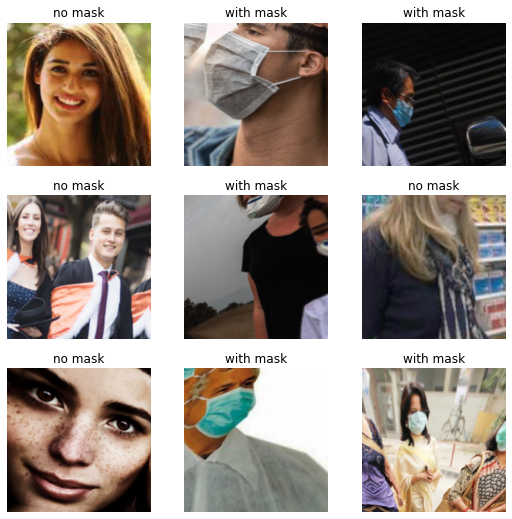

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [8]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.575363,0.752180,0.325000,00:15


epoch,train_loss,valid_loss,error_rate,time
0,1.051788,0.543189,0.325000,00:03
1,0.861620,0.227672,0.100000,00:03
2,0.689114,0.080212,0.025000,00:03
3,0.585296,0.032192,0.000000,00:03
4,0.519799,0.025476,0.000000,00:03


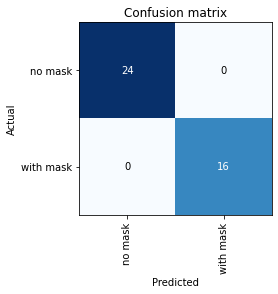

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [11]:
from PIL import Image
im = Image.open('/content/dlvyrcgnkszeodhqrtdqfietiaxpgc.jpg')

In [13]:
learn.predict('/content/dlvyrcgnkszeodhqrtdqfietiaxpgc.jpg')

('with mask', tensor(1), tensor([4.0434e-06, 1.0000e+00]))

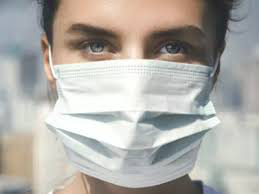

In [14]:
im